In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
data = pd.read_csv("/content/drive/My Drive/Final_Price_Data.csv")

In [3]:
data.head()

,Unnamed: 0,Date,MEDIUM (1.5 to 1.7 Kg),MOTA (1.8 to 2.3 Kg),PARENT (Per Kg),TANDURI (1.1 to 1.3 Kg),VEHICLE ARRIVED
0,0,01/01/2012,50.0,52.0,50.0,48.0,170.0
1,1,01/02/2012,52.0,53.0,50.0,50.0,140.0
2,2,01/03/2012,NaN,NaN,NaN,NaN,NaN
3,3,01/04/2012,52.0,52.0,50.0,50.0,150.0
4,4,01/05/2012,50.0,50.0,50.0,48.0,110.0


In [4]:
data.columns

Index(['Unnamed: 0', 'Date', 'MEDIUM (1.5 to 1.7 Kg)', 'MOTA (1.8 to 2.3 Kg)',
       'PARENT (Per Kg)', 'TANDURI (1.1 to 1.3 Kg)', 'VEHICLE ARRIVED'],
      dtype='object')

In [0]:
data.drop(['Unnamed: 0','MEDIUM (1.5 to 1.7 Kg)','TANDURI (1.1 to 1.3 Kg)' ,'PARENT (Per Kg)','VEHICLE ARRIVED'],axis = 1,inplace = True)

In [6]:
data.head()

,Date,MOTA (1.8 to 2.3 Kg)
0,01/01/2012,52.0
1,01/02/2012,53.0
2,01/03/2012,NaN
3,01/04/2012,52.0
4,01/05/2012,50.0


In [0]:
data['large'] = data['MOTA (1.8 to 2.3 Kg)'] 

In [0]:
data.drop(['MOTA (1.8 to 2.3 Kg)'],axis = 1,inplace= True)

In [9]:
data.head()

,Date,large
0,01/01/2012,52.0
1,01/02/2012,53.0
2,01/03/2012,NaN
3,01/04/2012,52.0
4,01/05/2012,50.0


In [12]:
data.isna().sum()

Date     0
large    0
dtype: int64

In [0]:
data['large'] = data['large'].fillna(method = 'ffill')

In [17]:
data.dtypes

Date     object
large    object
dtype: object

In [0]:
data['large'] = data['large'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [23]:
data.isna().sum()

Date       0
large    106
dtype: int64

In [0]:
data['large']= data['large'].fillna(int(130))

In [0]:
data['large'] = data['large'].astype(int)

In [26]:
data.head()

,Date,large
0,01/01/2012,52
1,01/02/2012,53
2,01/03/2012,53
3,01/04/2012,52
4,01/05/2012,50


In [0]:
data.to_csv('test.csv')

In [0]:
train = data.iloc[:,1:2].values

In [28]:
train.shape

(2583, 1)

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(train)

In [34]:
training_set_scaled.shape

(2583, 1)

In [0]:
# creating the data structure with 60 timesteps

In [0]:
X_train = []
y_train = []
for i in range(40,2583):
    X_train.append(training_set_scaled[i-40:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [37]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))


Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [38]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 40)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





2543/2543 [==============================] - 12s 5ms/step - loss: 0.0399
Epoch 2/100
2543/2543 [==============================] - 9s 4ms/step - loss: 0.0272
Epoch 3/100
2543/2543 [==============================] - 9s 4ms/step - loss: 0.0247
Epoch 4/100
2543/2543 [==============================] - 9s 4ms/step - loss: 0.0241
Epoch 5/100
2543/2543 [==============================] - 9s 4ms/step - loss: 0.0235
Epoch 6/100
2543/2543 [==============================] - 9s 4ms/step - loss: 0.0229
Epoch 7/100
2543/2543 [==============================] - 9s 4ms/step - loss: 0.0226
Epoch 8/100
2543/2543 [==============================] - 9s 4ms/step - loss: 0.0231
Epoch 9/100
2543/2543 [==============================] - 9s 4ms/step - loss: 0.0233
Epoch 10/100
2543/2543 [==============================] - 9s 4ms/step - loss: 0.0225
Epoch 11/100
2543/2543 [==============================]

In [44]:
train.dtype

dtype('int64')

In [0]:
test = data.iloc[2563:2583,:]

In [48]:
test.head()

,Date,large
2563,2019-07-01,78
2564,2019-08-01,78
2565,2019-09-01,78
2566,2019-10-01,78
2567,2019-11-01,78


In [0]:
dataset_total = pd.concat((data['large'],test['large']), axis = 0)

dtype('int64')

In [0]:
inputs = dataset_total[len(dataset_total) - len(test) - 40:].values

In [0]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(40, 60):
    X_test.append(inputs[i-40:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [56]:
predicted_stock_price

array([[78.16215 ],
       [78.18902 ],
       [78.18024 ],
       [78.15529 ],
       [78.13561 ],
       [78.13432 ],
       [78.14896 ],
       [78.16593 ],
       [78.17832 ],
       [78.172646],
       [78.164215],
       [78.15934 ],
       [78.15934 ],
       [78.15934 ],
       [78.15934 ],
       [78.15934 ],
       [78.15934 ],
       [78.15934 ],
       [78.15934 ],
       [78.15934 ]], dtype=float32)

In [0]:
real_price = test.iloc[:, 1:2].values

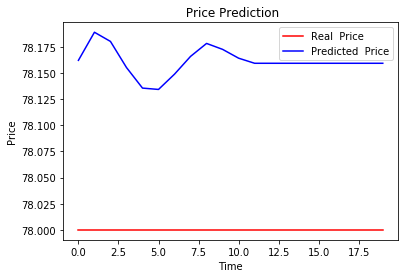

In [60]:
# Visualising the results
plt.plot(real_price, color = 'red', label = 'Real  Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted  Price')
plt.title(' Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()